# Random Forest Classification
**Bank Note Authentication**
([source link](https://machinelearningprojects.net/bank-note-authentication/))

In this project, we will see how we can perform Bank Note Authentication or how we can classify Bank Notes into fake or authentic classes based on numeric features like variance, skewness, kurtosis, and entropy.

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv("data/BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Check for null values

In [4]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

## Matrix of features and labels

In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (1372, 4)
y (1372,)


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (960, 4)
X_test (412, 4)
y_train (960,)
y_test (412,)


## Training the Random Forest Classification model

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## Predicting the test set

In [8]:
y_pred = rf.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


## Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.99      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



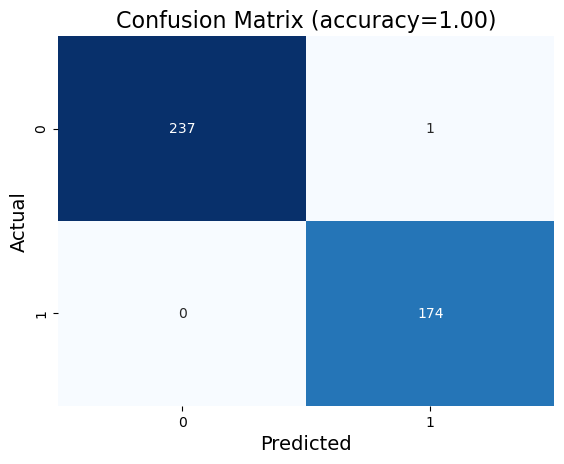

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);